# KNN in action
First, we import the libraries, load the dataset into pandas table and visualize what we have with seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris_df = pd.read_csv('Data/iris.csv', index_col='Id')
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


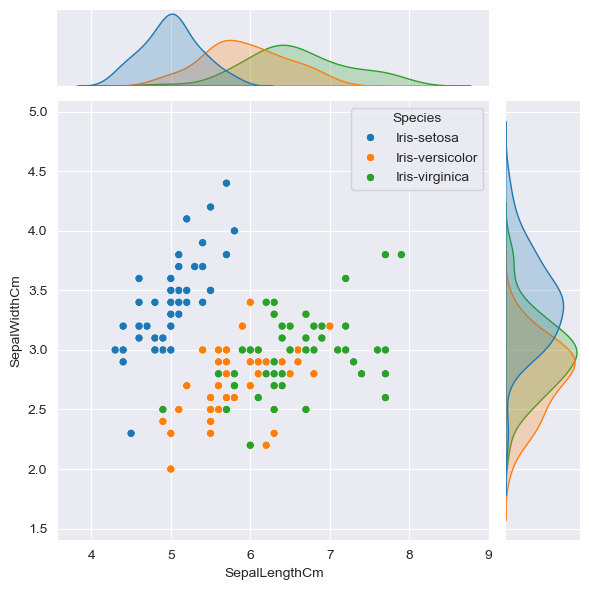

In [3]:
sns.jointplot(data=iris_df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

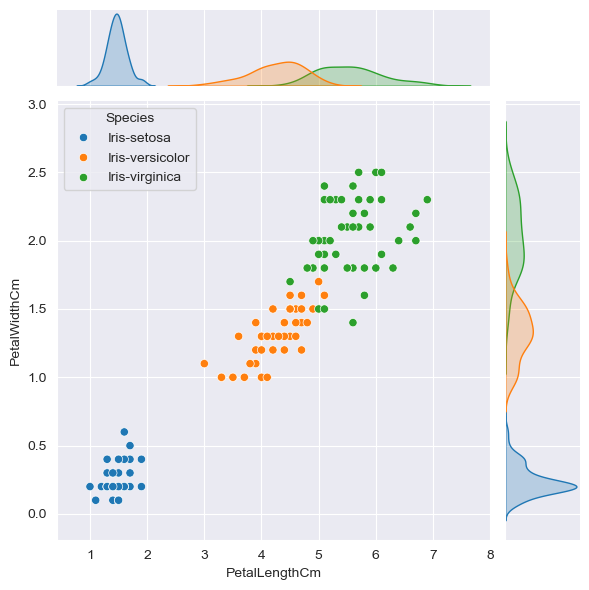

In [4]:
sns.jointplot(data=iris_df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

## Intuition behind kNN

<img src="Materials/knn.png" alt="drawing" width="800"/>

When we want to predict the class of the input data x, we look at its nearest neighbors and assume that x has the same class
&nbsp;
### Let's look at how sklearn implementation works
First, we split the dataset into train and test

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
res = train_test_split(iris_df, train_size=0.8, test_size=0.2, random_state=1)
train_df, test_df = res
train_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
92,6.1,3.0,4.6,1.4,Iris-versicolor
136,7.7,3.0,6.1,2.3,Iris-virginica
70,5.6,2.5,3.9,1.1,Iris-versicolor
129,6.4,2.8,5.6,2.1,Iris-virginica
115,5.8,2.8,5.1,2.4,Iris-virginica
...,...,...,...,...,...
134,6.3,2.8,5.1,1.5,Iris-virginica
138,6.4,3.1,5.5,1.8,Iris-virginica
73,6.3,2.5,4.9,1.5,Iris-versicolor


In [6]:
test_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
15,5.8,4.0,1.2,0.2,Iris-setosa
99,5.1,2.5,3.0,1.1,Iris-versicolor
76,6.6,3.0,4.4,1.4,Iris-versicolor
17,5.4,3.9,1.3,0.4,Iris-setosa
132,7.9,3.8,6.4,2.0,Iris-virginica
57,6.3,3.3,4.7,1.6,Iris-versicolor
142,6.9,3.1,5.1,2.3,Iris-virginica
45,5.1,3.8,1.9,0.4,Iris-setosa
30,4.7,3.2,1.6,0.2,Iris-setosa


In [7]:
knn = KNeighborsClassifier()
knn.fit(train_df.loc[:, train_df.columns!='Species'], train_df['Species'])

KNeighborsClassifier()

In [8]:
predicted = knn.predict(test_df.loc[:, test_df.columns!='Species'])
score = accuracy_score(predicted, test_df['Species'])
score

1.0

# Let's now predict flower's class from artificial data

In [9]:
predict_iris_df = pd.read_csv('Data/test_iris.csv', index_col='Id')
predict_iris = knn.predict(predict_iris_df)
predict_iris_df['Species'] = predict_iris
predict_iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,6.1,4.5,2.4,0.4,Iris-setosa
2,3.1,3.0,1.8,0.1,Iris-setosa
3,4.7,5.2,4.3,0.3,Iris-versicolor
4,3.6,2.1,2.5,1.4,Iris-versicolor
5,4.5,3.8,1.2,0.8,Iris-setosa
6,6.0,3.2,5.5,2.5,Iris-virginica


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

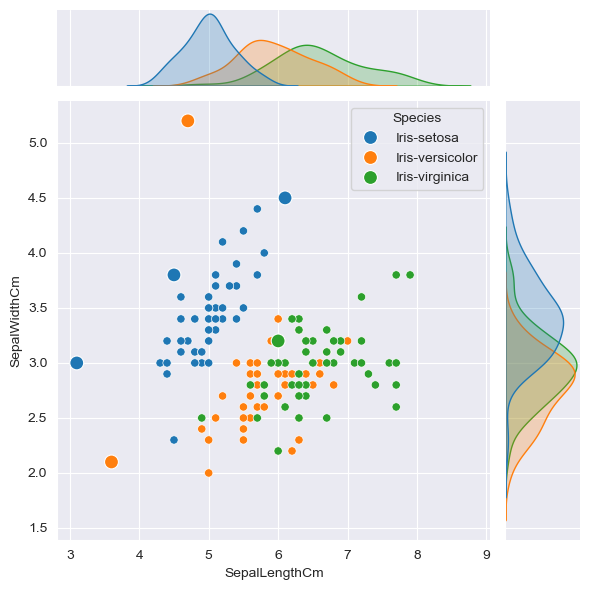

In [10]:
original = sns.jointplot(data=iris_df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", legend=False)
sns.scatterplot(data=predict_iris_df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", ax=original.ax_joint, s=100)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

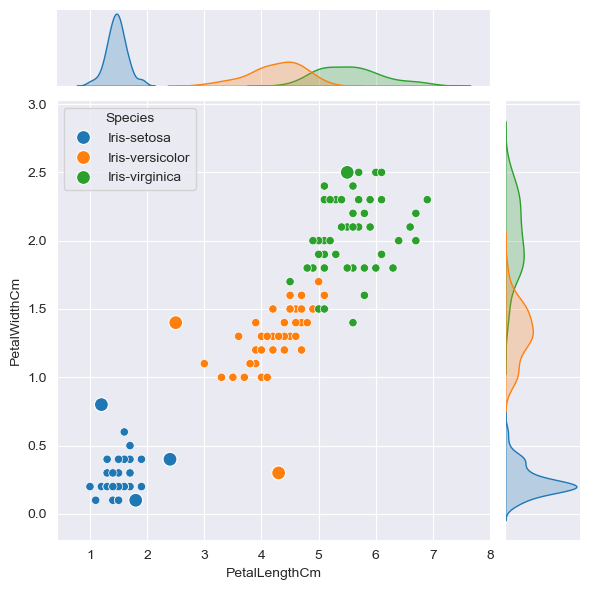

In [11]:
original = sns.jointplot(data=iris_df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", legend=False)
sns.scatterplot(data=predict_iris_df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", ax=original.ax_joint, s=100)